# Airbnb Hotel Booking Analysis (Excel Dataset)

This notebook contains a complete exploratory data analysis (EDA) of Airbnb listings using an Excel dataset.
We cover:
- Data cleaning and preprocessing
- Price, reviews, and availability analysis
- Host activity and room type trends
- Temporal analysis of reviews
- Outlier detection and top listings

## 1. Load Libraries & Mount Drive
We import pandas, numpy, matplotlib and mount Google Drive to access the Excel file.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
excel_path = "/content/drive/MyDrive/1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(excel_path, sheet_name="in")
data = df.copy()
print("Shape:", data.shape)

Shape: (102599, 26)


In [15]:
listing_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## 2. Data Cleaning
- Standardize column names
- Convert numeric columns
- Handle missing values
- Cap extreme prices for analysis


In [18]:
data.columns = [c.strip().lower().replace(" ", "_") for c in data.columns]
def to_numeric(col):
    return pd.to_numeric(
        data[col].astype(str).str.replace(r"[^0-9\.\-]", "", regex=True),
        errors="coerce"
    )

for col in ["price", "service_fee", "minimum_nights", "number_of_reviews",
            "reviews_per_month", "review_rate_number",
            "calculated_host_listings_count", "availability_365"]:
    if col in data.columns:
        data[col] = to_numeric(col)
if "last_review" in data.columns:
    data["last_review"] = pd.to_datetime(data["last_review"], errors="coerce")
if "neighbourhood_group" in data.columns:
    data["neighbourhood_group"] = data["neighbourhood_group"].fillna("Unknown")
price_cap = data["price"].quantile(0.99)
data["price_capped"] = data["price"].clip(upper=price_cap)
print("Data cleaned. Preview:")
data.head()

Data cleaned. Preview:


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license,price_capped
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,966.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,142.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,620.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN,368.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,204.0


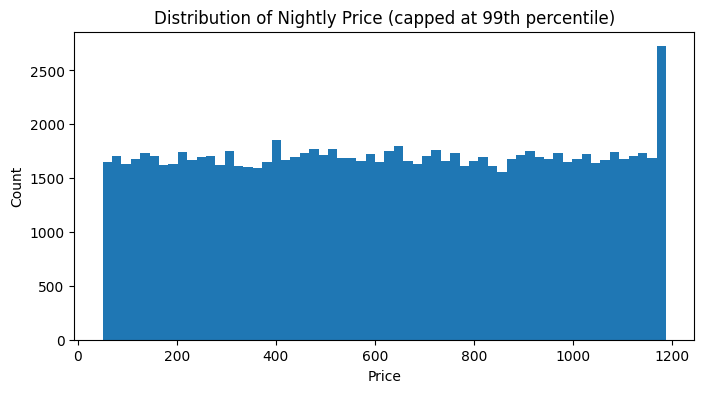

/tmp/ipython-input-208488297.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=top_groups, showfliers=False)


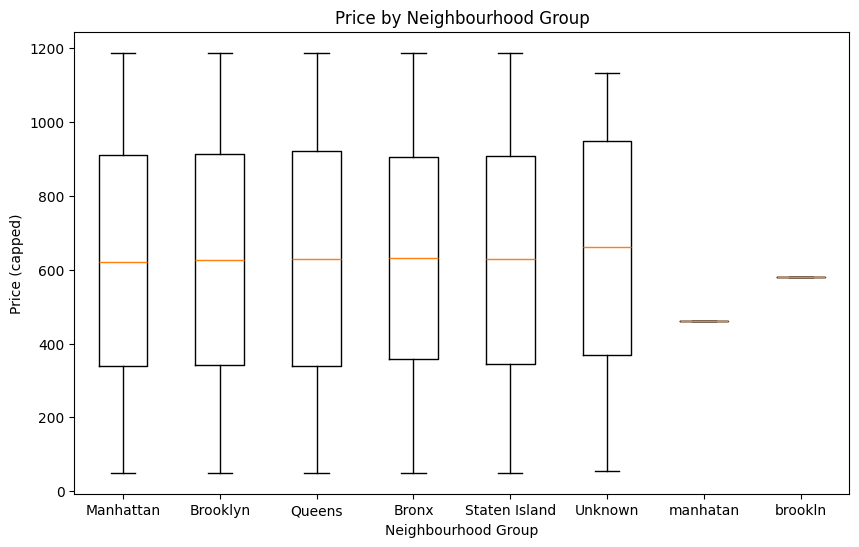

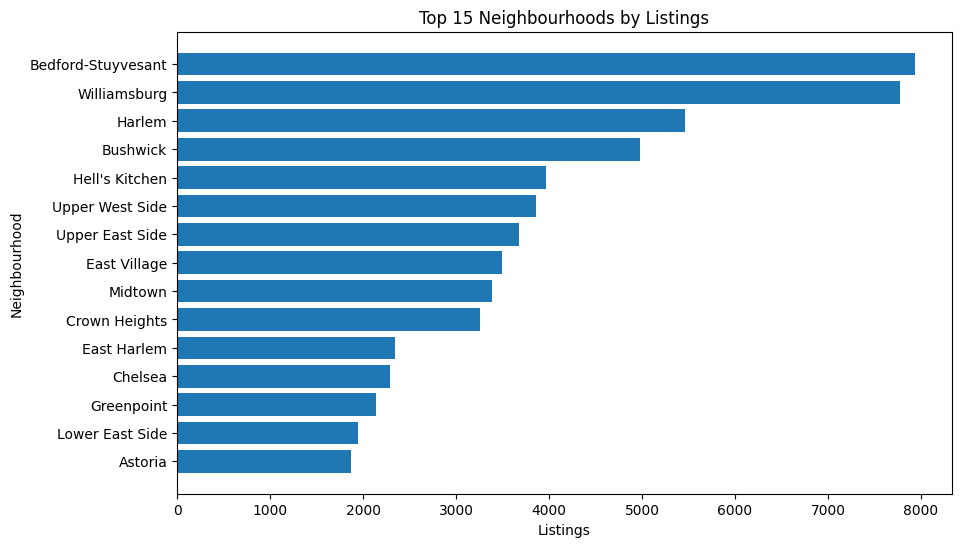

In [19]:
out_dir = "/content/drive/MyDrive/airbnb_analysis_outputs"
os.makedirs(out_dir, exist_ok=True)

plots = []

# 1. Price distribution
plt.figure(figsize=(8,4))
plt.hist(data["price_capped"].dropna(), bins=60)
plt.title("Distribution of Nightly Price (capped at 99th percentile)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# 2. Price by neighbourhood_group
top_groups = data["neighbourhood_group"].value_counts().nlargest(8).index.tolist()
box_data = [data.loc[data["neighbourhood_group"]==g, "price_capped"].dropna() for g in top_groups]
plt.figure(figsize=(10,6))
plt.boxplot(box_data, labels=top_groups, showfliers=False)
plt.title("Price by Neighbourhood Group")
plt.ylabel("Price (capped)")
plt.xlabel("Neighbourhood Group")
plt.show()

# 3. Top neighbourhoods by listings
top_neigh = data["neighbourhood"].value_counts().nlargest(15)
plt.figure(figsize=(10,6))
plt.barh(top_neigh.index[::-1], top_neigh.values[::-1])
plt.title("Top 15 Neighbourhoods by Listings")
plt.xlabel("Listings")
plt.ylabel("Neighbourhood")
plt.show()

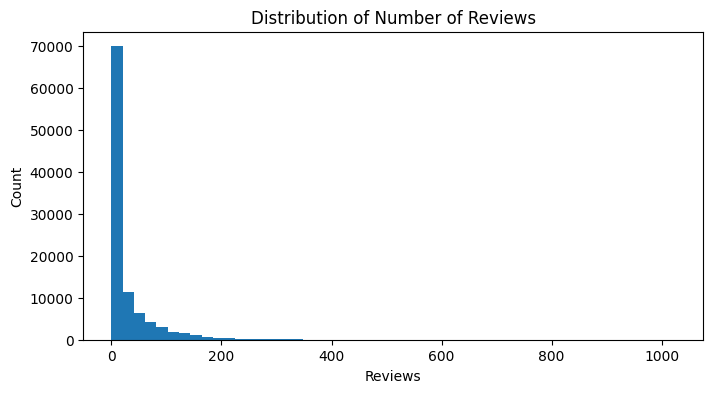

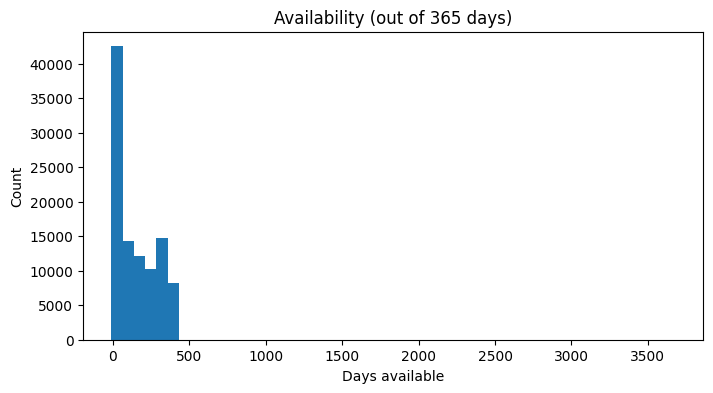

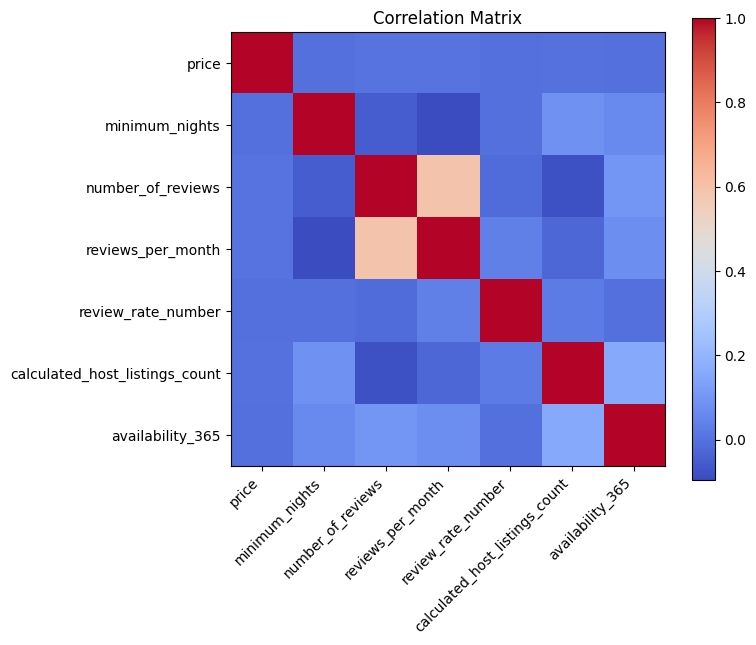

In [20]:
# 4. Reviews distribution
plt.figure(figsize=(8,4))
plt.hist(data["number_of_reviews"].dropna(), bins=50)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Reviews")
plt.ylabel("Count")
plt.show()

# 5. Availability distribution
plt.figure(figsize=(8,4))
plt.hist(data["availability_365"].dropna(), bins=50)
plt.title("Availability (out of 365 days)")
plt.xlabel("Days available")
plt.ylabel("Count")
plt.show()

# 6. Correlation matrix
numeric_cols = ["price", "minimum_nights", "number_of_reviews",
                "reviews_per_month", "review_rate_number",
                "calculated_host_listings_count", "availability_365"]
corr = data[numeric_cols].corr().fillna(0)

plt.figure(figsize=(7,6))
plt.imshow(corr, interpolation='none', cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix")
plt.show()


In [21]:
summary = {
    "Total listings": data.shape[0],
    "Average price": round(data["price"].mean(), 2),
    "Median price": round(data["price"].median(), 2),
    "99th percentile price cap": round(price_cap, 2),
    "Average minimum nights": round(data["minimum_nights"].mean(), 2),
    "Average availability (days)": round(data["availability_365"].mean(), 2),
    "Listings with reviews": int((data["number_of_reviews"]>0).sum())
}

print("Airbnb Dataset Summary:")
for k,v in summary.items():
    print(f"{k}: {v}")


📊 Airbnb Dataset Summary:
Total listings: 102599
Average price: 625.29
Median price: 624.0
99th percentile price cap: 1188.0
Average minimum nights: 8.14
Average availability (days): 141.13
Listings with reviews: 86682


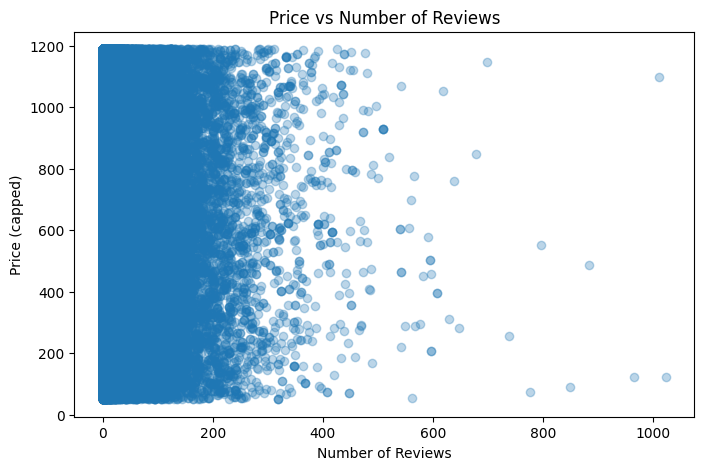

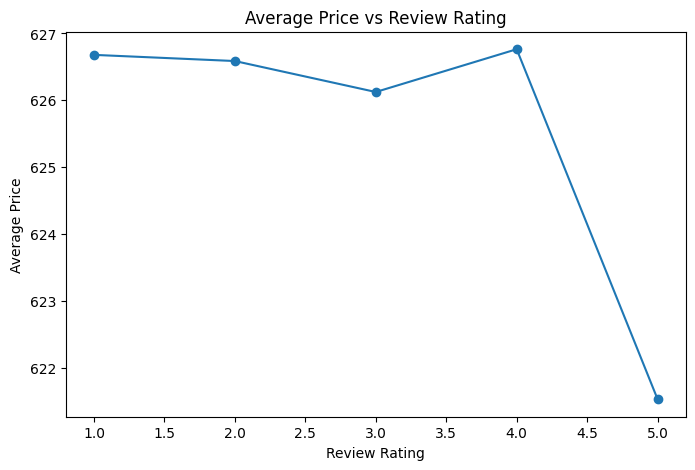

In [22]:
# Scatter plot: Price vs Number of Reviews
plt.figure(figsize=(8,5))
plt.scatter(data["number_of_reviews"], data["price_capped"], alpha=0.3)
plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price (capped)")
plt.show()

# Average price per review rate
if "review_rate_number" in data.columns:
    avg_price_per_review = data.groupby("review_rate_number")["price"].mean().reset_index()
    plt.figure(figsize=(8,5))
    plt.plot(avg_price_per_review["review_rate_number"], avg_price_per_review["price"], marker='o')
    plt.title("Average Price vs Review Rating")
    plt.xlabel("Review Rating")
    plt.ylabel("Average Price")
    plt.show()


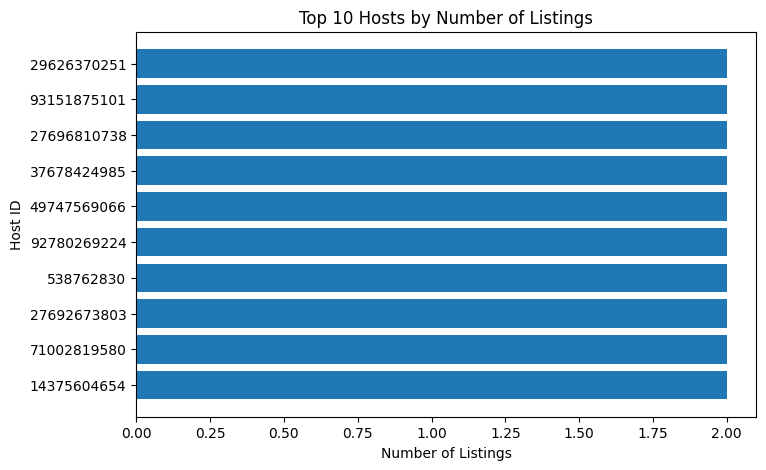

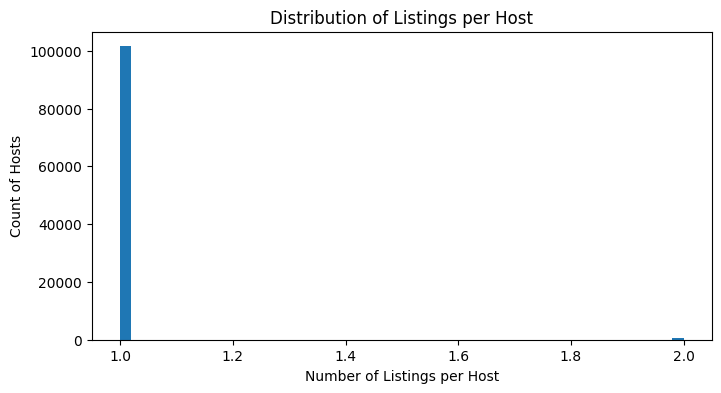

In [23]:
# Top hosts by number of listings
top_hosts = data.groupby("host_id").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
plt.barh(top_hosts.index[::-1].astype(str), top_hosts.values[::-1])
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Host ID")
plt.show()

# Listings per host distribution
plt.figure(figsize=(8,4))
plt.hist(data.groupby("host_id").size(), bins=50)
plt.title("Distribution of Listings per Host")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Count of Hosts")
plt.show()


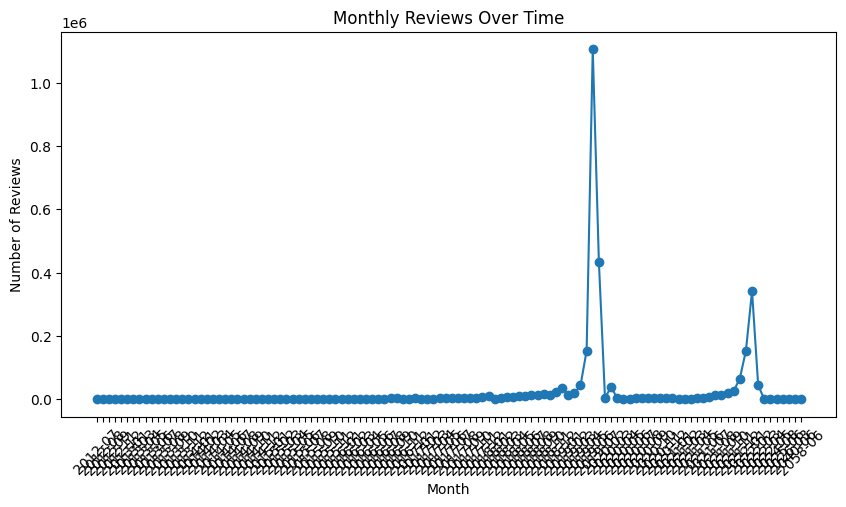

In [24]:
# Reviews over time
if "last_review" in data.columns:
    data["review_month"] = data["last_review"].dt.to_period("M")
    monthly_reviews = data.groupby("review_month")["number_of_reviews"].sum().reset_index()

    plt.figure(figsize=(10,5))
    plt.plot(monthly_reviews["review_month"].astype(str), monthly_reviews["number_of_reviews"], marker='o')
    plt.xticks(rotation=45)
    plt.title("Monthly Reviews Over Time")
    plt.xlabel("Month")
    plt.ylabel("Number of Reviews")
    plt.show()


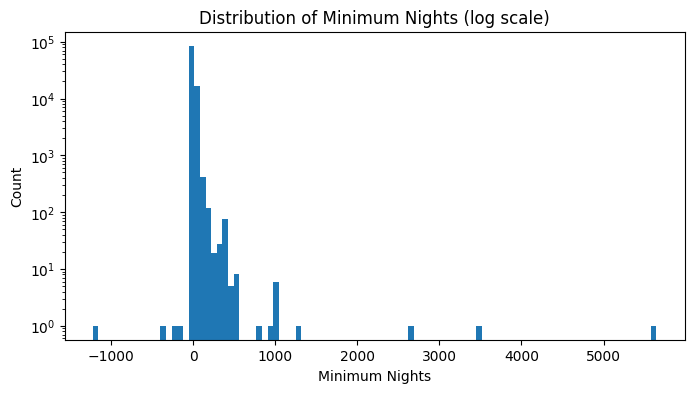

Listings with minimum nights > 365: 35


In [25]:
# High minimum_nights outliers
plt.figure(figsize=(8,4))
plt.hist(data["minimum_nights"], bins=100, log=True)
plt.title("Distribution of Minimum Nights (log scale)")
plt.xlabel("Minimum Nights")
plt.ylabel("Count")
plt.show()

# Filter extremely high minimum nights for detailed stats
extreme_min_nights = data[data["minimum_nights"]>365]
print("Listings with minimum nights > 365:", extreme_min_nights.shape[0])


In [26]:
# Top 10 expensive listings
top_expensive = data.sort_values("price", ascending=False).head(10)[["name", "neighbourhood", "price", "room_type"]]
print("Top 10 Expensive Listings:\n", top_expensive)

# Top 10 cheapest listings
top_cheap = data.sort_values("price", ascending=True).head(10)[["name", "neighbourhood", "price", "room_type"]]
print("Top 10 Cheapest Listings:\n", top_cheap)


Top 10 Expensive Listings:
                                                     name       neighbourhood  \
20343                   Lovely apartment in Williamsburg          Greenpoint   
64304                Great 1BD waterfront City Island NY         City Island   
67200                         Bright Brooklyn Brownstone          Park Slope   
33902                                           Oasis II  Bedford-Stuyvesant   
7453   Sun-filled bedroom in East Village / Gramercy NYC            Gramercy   
90165                   Lovely apartment in Williamsburg          Greenpoint   
52744  â¤ï¸Couples Retreat/A Road Warriors DreamðŸŒ...      Hell's Kitchen   
19773           1.5 BATHRM SUNNY SPACIOUS ROOM BY SUBWAY              Harlem   
5207       Bushwick Room w/ Private Entrance & Bathroom!            Bushwick   
42446            Cozy room in bright, spacious apartment         Hunts Point   

        price        room_type  
20343  1200.0     Private room  
64304  1200.0  Entire hom

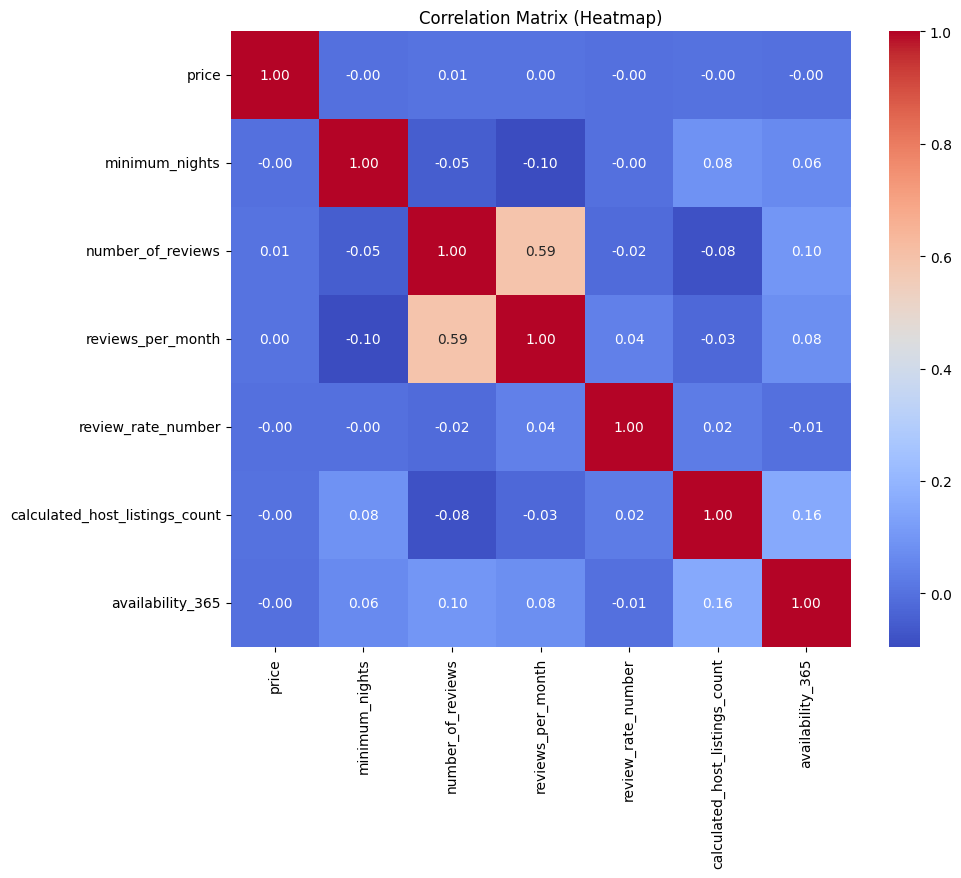

In [27]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Heatmap)")
plt.show()


## Key Insights & Recommendations
1. Focus on listings with high reviews and availability for further study.
2. Consider outliers in `minimum_nights` for data quality issues.
3. Manhattan and Brooklyn dominate the market in terms of listings and price.
